In [53]:
import os, sys
import itertools

import graphlab as gl
import graphlab.aggregate as agg
from tqdm import tqdm_notebook as tqdm

# set canvas path
# gl.canvas.set_target('ipynb')

%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [31]:
song_data = gl.SFrame('data/song_data.gl/')

In [32]:
song_data.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


In [33]:
len(song_data)

1116609

## Count number of users

In [34]:
users = song_data['user_id'].unique()
len(users)

66346

# Create a song recommender

In [36]:
train_data, test_data = gl.recommender.util.random_split_by_user(
    song_data,
    'user_id',
    'song_id',
    max_num_users=0.4*len(users)
)

## Popularity model

In [37]:
popularity_model = gl.popularity_recommender.create(train_data, user_id='user_id', item_id='song')

Recsys training: model = popularity

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 1026898 observations with 66280 users and 9952 items.

Data prepared in: 0.876915s

1026898 observations to process; with 9952 unique items.

### Use popularity model for predictions

In [38]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Undo - Björk,4833.0,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,You're The One - DwightYoakam ...,4395.0,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,4172.0,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Revelry - Kings Of Leon,3998.0,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,3633.0,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3626.0,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Tive Sim - Cartola,2945.0,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,2935.0,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Drop The World - LilWayne / Eminem ...,2362.0,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,OMG - Usher featuringwill.i.am ...,2338.0,10


In [39]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,5479.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4833.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,4395.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,4172.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3998.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3633.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3626.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2945.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2935.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2885.0,10


## Build a song recommender with personalization

In [40]:
i2i_model = gl.item_similarity_recommender.create(train_data, user_id='user_id', item_id='song')

Recsys training: model = item_similarity

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 1026898 observations with 66280 users and 9952 items.

Data prepared in: 0.908697s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 7.143ms                        | 6          |

| 61.912ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 233.986ms                           | 0                | 0               |

| 1.01s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.09786s

### Applying personalized model

In [41]:
i2i_model.recommend(users=[users[0]])

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Just Friends - AmyWinehouse ...,0.0289213814233,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Wake Up Alone - AmyWinehouse ...,0.0263299785162,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Some Unholy War - AmyWinehouse ...,0.0254972012419,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,He Can Only Hold Her -Amy Winehouse ...,0.024244101424,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,0.0221468994492,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Addicted - Amy Winehouse,0.0215355157852,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,0.021092778758,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,0.0203879381481,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Esa noche - Café Tacvba,0.0199896505004,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Valerie - Amy Winehouse,0.0192992749967,10


In [42]:
i2i_model.recommend(users=[users[1]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.0504807680845,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.042288556695,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.042056068778,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.0377952754498,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0376344025135,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.0348837226629,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.0332192778587,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.0296296328306,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.0245836824179,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Halfway There - RiseAgainst ...,0.0238763988018,10


In [43]:
i2i_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.0538599491119,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.0484210252762,2
With Or Without You - U2,Window In The Skies - U2,0.0474933981895,3
With Or Without You - U2,Vertigo - U2,0.0437787771225,4
With Or Without You - U2,A Day Without Me - U2,0.0375426411629,5
With Or Without You - U2,Sunday Bloody Sunday - U2,0.035830616951,6
With Or Without You - U2,Bad - U2,0.0309597253799,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.0243902206421,8
With Or Without You - U2,Walk On - U2,0.0232558250427,9
With Or Without You - U2,Mysterious Ways - U2,0.0213414430618,10


## Quantitative comparison between models

In [61]:
model_names = ['Popularity Recommender', 'Personalized Recommender']
model_performance = gl.recommender.util.compare_models(
    test_data,
    [popularity_model, i2i_model],
    model_names=model_names
)

PROGRESS: Evaluate model Popularity Recommender


recommendations finished on 1000/23112 queries. users per second: 11497.2

recommendations finished on 2000/23112 queries. users per second: 12005.4

recommendations finished on 3000/23112 queries. users per second: 12541.2

recommendations finished on 4000/23112 queries. users per second: 13309.7

recommendations finished on 5000/23112 queries. users per second: 13619

recommendations finished on 6000/23112 queries. users per second: 13564

recommendations finished on 7000/23112 queries. users per second: 12902

recommendations finished on 8000/23112 queries. users per second: 13124.2

recommendations finished on 9000/23112 queries. users per second: 13150.9

recommendations finished on 10000/23112 queries. users per second: 13181

recommendations finished on 11000/23112 queries. users per second: 12973.1

recommendations finished on 12000/23112 queries. users per second: 13041.1

recommendations finished on 13000/23112 queries. users per second: 13171.9

recommendations finished on 14000/23112 queries. users per second: 13250.2

recommendations finished on 15000/23112 queries. users per second: 13305.6

recommendations finished on 16000/23112 queries. users per second: 13314.2

recommendations finished on 17000/23112 queries. users per second: 13264.7

recommendations finished on 18000/23112 queries. users per second: 13362.9

recommendations finished on 19000/23112 queries. users per second: 13407.4

recommendations finished on 20000/23112 queries. users per second: 13450.8

recommendations finished on 21000/23112 queries. users per second: 13471.5

recommendations finished on 22000/23112 queries. users per second: 13328.4

recommendations finished on 23000/23112 queries. users per second: 13035.9


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    | 0.0290758047767 | 0.00820801165227 |
|   2    | 0.0284700588439 | 0.0162514253693  |
|   3    | 0.0253115264798 | 0.0213311508909  |
|   4    |  0.023721443406 | 0.0264510931034  |
|   5    | 0.0213828314296 | 0.0295819737752  |
|   6    | 0.0199247144341 | 0.0330008605386  |
|   7    | 0.0188399347278 | 0.0362719813282  |
|   8    | 0.0179722654898 | 0.0393916647341  |
|   9    | 0.0172926041306 | 0.0422712744574  |
|   10   | 0.0165541709934 | 0.0445439139006  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model Personalized Recommender


recommendations finished on 1000/23112 queries. users per second: 9041.51

recommendations finished on 2000/23112 queries. users per second: 9826.9

recommendations finished on 3000/23112 queries. users per second: 10600.5

recommendations finished on 4000/23112 queries. users per second: 10882.8

recommendations finished on 5000/23112 queries. users per second: 11089.2

recommendations finished on 6000/23112 queries. users per second: 11073.3

recommendations finished on 7000/23112 queries. users per second: 11314.8

recommendations finished on 8000/23112 queries. users per second: 11263.9

recommendations finished on 9000/23112 queries. users per second: 11207.5

recommendations finished on 10000/23112 queries. users per second: 11211.5

recommendations finished on 11000/23112 queries. users per second: 11333.7

recommendations finished on 12000/23112 queries. users per second: 11490

recommendations finished on 13000/23112 queries. users per second: 11399.8

recommendations finished on 14000/23112 queries. users per second: 11410.2

recommendations finished on 15000/23112 queries. users per second: 11477.3

recommendations finished on 16000/23112 queries. users per second: 11559.1

recommendations finished on 17000/23112 queries. users per second: 11514.5

recommendations finished on 18000/23112 queries. users per second: 11607.8

recommendations finished on 19000/23112 queries. users per second: 11695.4

recommendations finished on 20000/23112 queries. users per second: 11745.3

recommendations finished on 21000/23112 queries. users per second: 11773.9

recommendations finished on 22000/23112 queries. users per second: 11826.1

recommendations finished on 23000/23112 queries. users per second: 11620.6


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.197040498442 |  0.061408969675 |
|   2    |  0.165584977501 | 0.0978231611376 |
|   3    |  0.144455982462 |  0.124803851875 |
|   4    |  0.128547940464 |  0.145837848765 |
|   5    |  0.116346486674 |  0.162624883284 |
|   6    |  0.106957424714 |  0.178010892414 |
|   7    | 0.0988787519161 |  0.190359585819 |
|   8    | 0.0923870716511 |  0.202353466687 |
|   9    | 0.0869293488712 |  0.213244174747 |
|   10   | 0.0822992384908 |  0.222952455528 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]



### Plot % Lift in MAP@10

Compare the personalized model by plotting the gain in MAP@10 (Mean Average Precision) over the popularity model

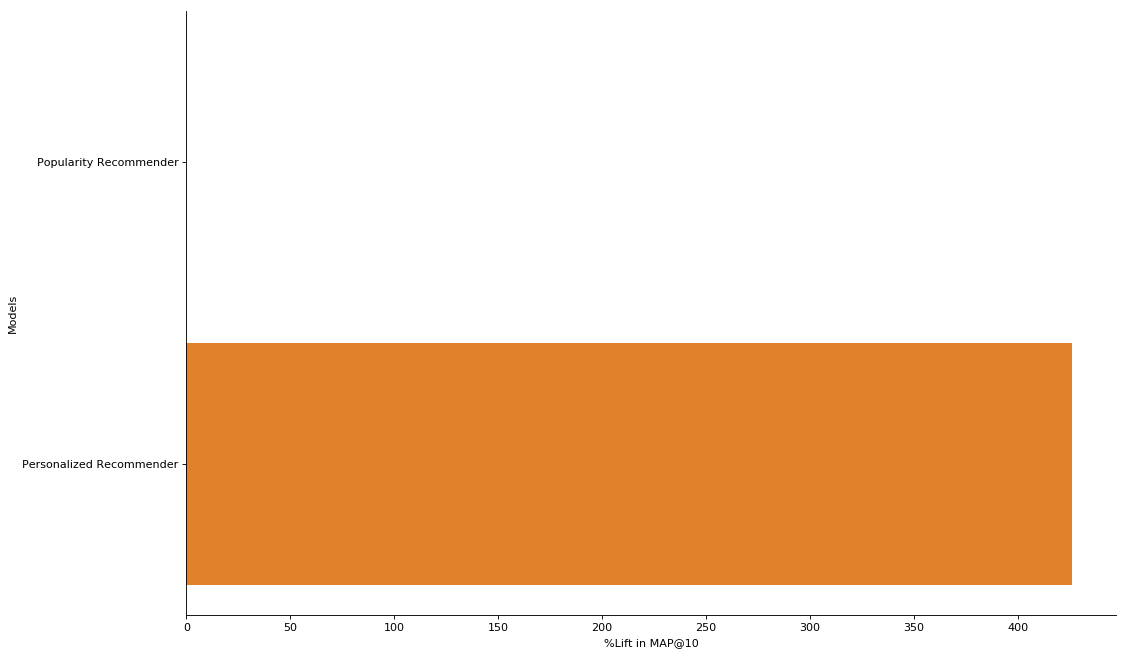

In [62]:
def get_pr_dataframe(pr_curve):
    return pr_curve['precision_recall_overall'].to_dataframe()

def get_lift_in_precision(model_map, baseline_map):
    if baseline_map <= 0.0:
        raise ValueError('Baseline MAP is 0. Please check')
    return round((model_map - baseline_map) / baseline_map * 100, 2)

# Calculate baseline model MAP -- Popularity Recommender
baseline_df = get_pr_dataframe(model_performance[0])
baseline_map = baseline_df['precision'].mean()

# Calculate lifts wrt to baseline for all models
lift_dfs = map(get_pr_dataframe, model_performance)
lifts = []
for model_name, df in zip(model_names, lift_dfs):
    lifts.append(get_lift_in_precision(df['precision'].mean(), baseline_map))

# Plots lifts
plt.figure(num=1, figsize=(15, 10), dpi=80)
axis_to_work = plt
plot_data = pd.DataFrame({'model': model_names, 'lift': lifts})
sns.barplot(x='lift', y='model', data=plot_data)
plt.xlabel('%Lift in MAP@10')
plt.ylabel('Models')
sns.despine(top=True, right=True)
axis_to_work.legend()
axis_to_work.show()